In [399]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
import sys
sys.path.append('..')
sys.path.append('../..')
sys.path.append('.')
sys.path.append('./scripts')
from simulations_util import *
from util import  apply_splitting_strategy
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)

In [400]:
dgp = "linear" # "linear", "linear_lss" "interaction" "logistic_linear" "logistic_interaction" "logistic_linear_lss"
data = "openml_361254" 

# "openml_43" "openml_9946" "openml_9978" "openml_146819" "openml_361062" "openml_361070"
# "openml_361242" "openml_361253" "openml_361254" "openml_361259" "openml_361260" "openml_361622"

task = "regression" # "regression" "classification"
if task == "regression":
    param = "heritability"
else:
    param = "frac_label_corruption"
    
ablation_directory = f"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results_old/mdi_local.real_data_{task}_{data}_{dgp}/{data}_{dgp}/varying_{param}"

combined_df = pd.DataFrame()
feature_seeds = [1]#,2,4,5]
error_seeds = [4]#,2]#,3]
for error_seed in error_seeds:
    for feature_seed in feature_seeds:
        #df = pd.read_csv(os.path.join(ablation_directory, f"seed_{error_seed}_{feature_seed}/results.csv"))
        df = pd.read_csv(os.path.join(ablation_directory, f"seed{error_seed}{feature_seed}/results.csv"))        
        combined_df = pd.concat([combined_df, df], ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: '/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results_old/mdi_local.real_data_regression_openml_361254_linear/openml_361254_linear/varying_heritability/seed41/results.csv'

In [ ]:
#assert combined_df.shape[0] == 520

In [ ]:
# support_columns = [col for col in combined_df.columns if col.startswith('support')]
# unique_combinations = combined_df[support_columns].drop_duplicates()
# unique_combinations

##### Plot AUROC/RBO Performance

In [ ]:
combined_df["train_size"].unique()

array([1340])

In [ ]:
combined_df["test_size"].unique()

array([660])

In [ ]:
result_df = combined_df.groupby(['train_size', param, 'fi'])[["auroc_train", "auroc_test"]].mean().reset_index()

In [ ]:
methods = [
    'TreeSHAP_RF',
    'LIME_RF',
    #'Random',
    'MDI',
    # 'Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus',
    # 'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus',
    'Local_MDI+_MDI_lasso_fit_on_all_ranking_RFPlus',
    # 'Local_MDI+_MDI_lasso_fit_on_all_RFPlus',
]

color_map = {
    # Core methods
    'Random': 'gray',  # Neutral color
    'LIME_RF': '#71BEB7',  # Turquoise
    'TreeSHAP_RF': 'orange',  # Distinctive orange
    'MDI': '#8B4513',  # Brown for distinction

    # 'Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus': '#673AB7',  # Indigo
    # 'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': '#D4AC0D',  # Pink
    'Local_MDI+_MDI_lasso_fit_on_all_ranking_RFPlus': '#3357FF',  # Amber

    # 'Local_MDI+_MDI_fit_on_oob_ranking_RFPlus': '#009688',  # Teal
    # 'Local_MDI+_MDI_fit_on_oob_best_ranking_RFPlus': '#FFC107',  # Goldenrod
    # 'Local_MDI+_MDI_ridge_fit_on_oob_ranking_RFPlus': '#607D8B',  # Gray-blue
    # 'Local_MDI+_MDI_elasticnet_fit_on_oob_ranking_RFPlus': '#FF5733',  # Bright red-orange
    # 'Local_MDI+_MDI_lasso_fit_on_all_RFPlus': '#E91E63',  # Deep pink
}

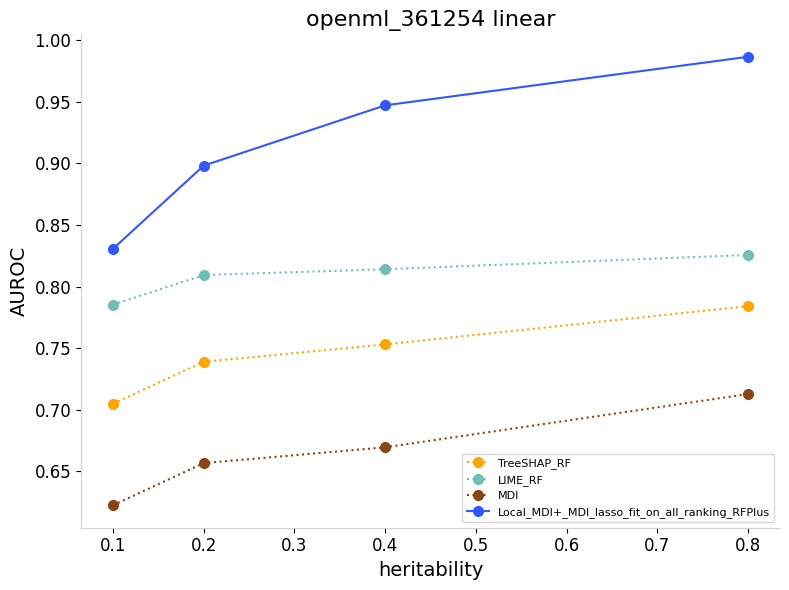

In [ ]:
# Set global parameters for plots
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Remove chartjunk: Remove right and top spines, and change edge color to light grey
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

# Define marker size
marker_size = 7

# Create a single subplot for AUROC Test
fig, ax = plt.subplots(figsize=(8, 6))

# Define the DataFrame
df = result_df

# List of methods with dotted line style
dotted_methods = ['LIME_RF', 'TreeSHAP_RF', 'MDI']

# Plot AUROC Test
for method in methods:
    subset = df[df['fi'] == method]
    if method in dotted_methods:
        ax.plot(
            subset[param], subset['auroc_train'],
            label=method, linestyle="dotted", color=color_map[method], marker='o', markersize=marker_size
        )
    else:
        ax.plot(
            subset[param], subset['auroc_train'],
            label=method, linestyle="solid", color=color_map[method], marker='o', markersize=marker_size
        )

# Set labels, title, and legend
ax.set_title(data+" "+dgp, fontsize=16)
ax.set_xlabel(param, fontsize=14)
ax.set_ylabel('AUROC', fontsize=14)
ax.legend(fontsize=8, title_fontsize=10, loc='best')

# Adjust layout and show plot
plt.tight_layout()
# plt.savefig(f'auroc_{data}_{dgp}.png')
plt.show()

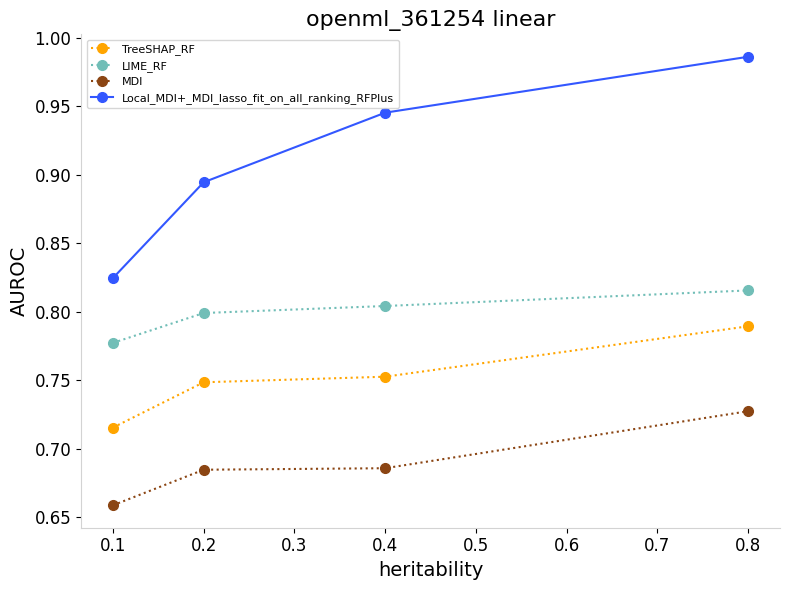

In [ ]:
# Set global parameters for plots
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Remove chartjunk: Remove right and top spines, and change edge color to light grey
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

# Define marker size
marker_size = 7

# Create a single subplot for AUROC Test
fig, ax = plt.subplots(figsize=(8, 6))

# Define the DataFrame
df = result_df

# List of methods with dotted line style
dotted_methods = ['LIME_RF', 'TreeSHAP_RF', 'MDI']

# Plot AUROC Test
for method in methods:
    subset = df[df['fi'] == method]
    if method in dotted_methods:
        ax.plot(
            subset[param], subset['auroc_test'],
            label=method, linestyle="dotted", color=color_map[method], marker='o', markersize=marker_size
        )
    else:
        ax.plot(
            subset[param], subset['auroc_test'],
            label=method, linestyle="solid", color=color_map[method], marker='o', markersize=marker_size
        )

# Set labels, title, and legend
ax.set_title(data+" "+dgp, fontsize=16)
ax.set_xlabel(param, fontsize=14)
ax.set_ylabel('AUROC', fontsize=14)
ax.legend(fontsize=8, title_fontsize=10, loc='best')

# Adjust layout and show plot
plt.tight_layout()
# plt.savefig(f'auroc_{data}_{dgp}.png')
plt.show()


In [ ]:
# # Set global parameters for plots
# plt.rcParams['axes.labelsize'] = 28
# plt.rcParams['xtick.labelsize'] = 12
# plt.rcParams['ytick.labelsize'] = 12

# # Remove chartjunk: Remove right and top spines, and change edge color to light grey
# plt.rcParams['axes.spines.right'] = False
# plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.edgecolor'] = 'lightgrey'

# # Define marker size
# marker_size = 7

# # Create a single subplot for AUROC Test
# fig, ax = plt.subplots(figsize=(8, 6))

# # Define the DataFrame
# df = result_df

# # List of methods with dotted line style
# dotted_methods = ['LIME_RF', 'TreeSHAP_RF', 'MDI']

# # Plot AUROC Test
# for method in methods:
#     subset = df[df['fi'] == method]
#     if method in dotted_methods:
#         ax.plot(
#             subset['heritability'], subset['auprc_test'],
#             label=method, linestyle="dotted", color=color_map[method], marker='o', markersize=marker_size
#         )
#     else:
#         ax.plot(
#             subset['heritability'], subset['auprc_test'],
#             label=method, linestyle="solid", color=color_map[method], marker='o', markersize=marker_size
#         )

# # Set labels, title, and legend
# ax.set_title(data+" "+dgp, fontsize=16)
# ax.set_xlabel('PVE', fontsize=14)
# ax.set_ylabel('AUROC', fontsize=14)
# ax.legend(fontsize=8, title_fontsize=10, loc='best')

# # Adjust layout and show plot
# plt.tight_layout()
# # plt.savefig(f'auroc_{data}_{dgp}.png')
# plt.show()
